<a href="https://colab.research.google.com/github/Eliasamuneke/Quickstart_lab/blob/main/IMAGE_CLASSIFICATION_ON_CIFAR_10_DATASET_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importng the necessary library

In [71]:
import pandas as pd                                                             # Importing the pandas module for dataframing
import numpy as np                                                              # Importing the numpy module for array manipulation
import matplotlib.pyplot as plt                                                 # Importing the matplotlib module for plotting the graph
from tensorflow.keras.datasets import cifar10                                   # Downloading the cifar10 module dataset
from tensorflow.keras.utils import to_categorical                               # Importing the categorical dataset module for making the categorical dataset
from tensorflow.keras.models import Sequential                                  # Importing the sequential module
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten           # Importing the all layers type
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix             # Importing the confusion matrix module for checking the accuracy
import seaborn as sns
from keras.datasets import cifar10                                              # example of loading the cifar10 dataset
%matplotlib inline

### Downlaoding the dataset and reading train and test dataset

In [72]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()                      # load dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))                       # summarize loaded dataset
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


### Plotting some train images

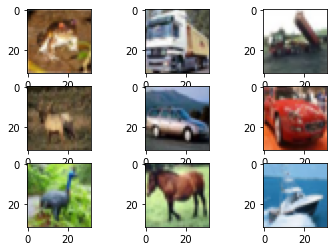

In [73]:
for i in range(9):                                                         # plot first few images
	pyplot.subplot(330 + 1 + i)                                              # define subplot
	pyplot.imshow(trainX[i])                                                 # plot raw pixel data
pyplot.show()                                                              # show the figure

In [74]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

### Checking the predictor train shape

In [75]:
X_train[0].shape

(32, 32, 3)

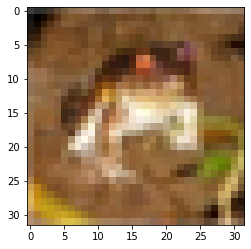

In [76]:
plt.imshow(X_train[0])

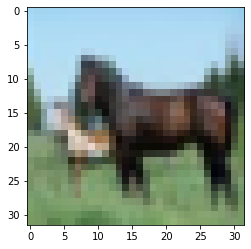

In [77]:
plt.imshow(X_train[12])

In [78]:
X_train = X_train/255
X_test = X_test/255

In [79]:
y_cat_train  = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

### Building the model

In [80]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 512)              

In [82]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)
early_stop

### Training the model with 10 epochs

In [84]:
model.fit(X_train, y_cat_train, validation_data = (X_test, y_cat_test), epochs = 10, callbacks = [early_stop])

Epoch 1/10
1563/1563 [==============================] - 115s 73ms/step - loss: 1.4199 - accuracy: 0.4847 - val_loss: 1.1769 - val_accuracy: 0.5860
Epoch 2/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.0947 - accuracy: 0.6141 - val_loss: 1.0506 - val_accuracy: 0.6322
Epoch 3/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.9183 - accuracy: 0.6767 - val_loss: 0.9692 - val_accuracy: 0.6681
Epoch 4/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.7805 - accuracy: 0.7266 - val_loss: 1.0176 - val_accuracy: 0.6522
Epoch 5/10
1563/1563 [==============================] - 110s 71ms/step - loss: 0.6614 - accuracy: 0.7678 - val_loss: 1.0312 - val_accuracy: 0.6628


### Printing the trained model summary value

In [85]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.419870,0.48466,1.176915,0.5860
1,1.094655,0.61408,1.050595,0.6322
2,0.918330,0.67670,0.969197,0.6681
3,0.780489,0.72664,1.017623,0.6522
4,0.661432,0.76780,1.031184,0.6628


### Plotting the graph of accuracy vs validation accuracy

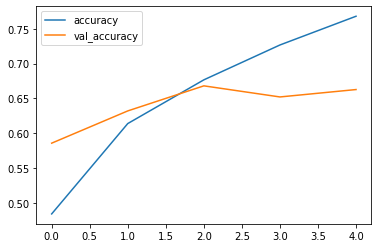

In [86]:
metrics[["accuracy", "val_accuracy"]].plot()

### Plotting the graph of loss vs validation loss

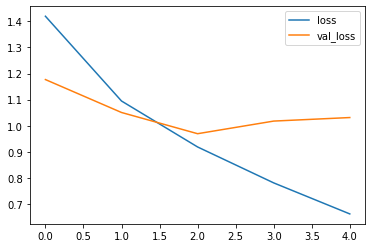

In [87]:
metrics[["loss", "val_loss"]].plot()

### Evaluating the model

In [88]:
model.evaluate(X_test, y_cat_test, verbose = 1)

313/313 [==============================] - 6s 19ms/step - loss: 1.0312 - accuracy: 0.6628


[1.0311836004257202, 0.6628000140190125]

### Predicting the value by trained model

In [89]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 6s 18ms/step


### Printing the model predicted summary

In [90]:
print(classification_report(y_test, classes_x))


              precision    recall  f1-score   support

           0       0.79      0.63      0.70      1000
           1       0.83      0.78      0.80      1000
           2       0.59      0.52      0.55      1000
           3       0.41      0.54      0.47      1000
           4       0.62      0.58      0.60      1000
           5       0.48      0.64      0.55      1000
           6       0.85      0.64      0.73      1000
           7       0.68      0.79      0.73      1000
           8       0.80      0.79      0.80      1000
           9       0.80      0.73      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.69      0.66      0.67     10000
weighted avg       0.69      0.66      0.67     10000



In [91]:
confusion_matrix(y_test, classes_x)

array([[630,  34,  85,  62,  35,  17,   4,  12,  79,  42],
       [ 16, 777,  13,  34,   6,  17,  12,   8,  33,  84],
       [ 39,   8, 521, 127, 100, 110,  30,  48,  10,   7],
       [ 10,   9,  46, 543,  48, 247,  23,  57,   7,  10],
       [  9,   3,  72, 109, 576,  90,  21, 107,  11,   2],
       [  2,   3,  40, 179,  22, 642,   8,  97,   3,   4],
       [  1,   7,  55, 115,  69,  88, 639,  17,   4,   5],
       [ 10,   1,  22,  47,  55,  70,   2, 786,   1,   6],
       [ 50,  29,  18,  51,  13,  20,   1,   4, 788,  26],
       [ 28,  69,  12,  56,   9,  23,   8,  23,  46, 726]])

### Plotting the heatmap of confusion matrix

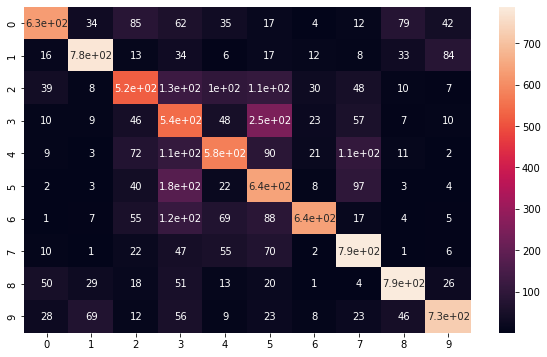

In [92]:
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test, classes_x), annot = True)

### Showing the test iamges values

In [93]:
my_image = X_test[0]
my_image

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

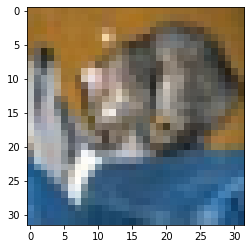

In [94]:
plt.imshow(my_image)

### Reshaping the predicted output value

In [96]:
model.predict(my_image.reshape(1, 32, 32, 3))

1/1 [==============================] - 0s 26ms/step


array([[4.1999108e-05, 2.2635989e-04, 3.7325261e-04, 9.0608191e-01,
        5.2783359e-04, 8.9243725e-02, 1.9733578e-03, 7.0612953e-04,
        7.6107879e-04, 6.4390559e-05]], dtype=float32)